Plotting libraries are imported as preparation for evaluation, as well as the functional NumPy and Pandas libraries. The model was constructed using Scikit learn as its backbone

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Since the logistic regression model can operate with non-one-hot encoded labels the cleaned dataset is used instaed of the one-hot encoded dataset

In [2]:
df= pd.read_csv("/workspaces/Predicting-Hypertension-/Hypertension_Cleaned.csv")
df=df.drop('Unnamed: 0', axis=1)# delete unwanted index column
df= df.drop('Risk', axis=1) # delete the binary risk column
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Hyp_stage
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,Normal
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,Stage 1 Hypertension
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,Stage 1 Hypertension
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,Stage 2 Hypertension
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,Stage 1 Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,248.0,131.0,72.0,22.00,84.0,86.0,Stage 1 Hypertension
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,78.0,Stage 1 Hypertension
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,Stage 1 Hypertension
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,Stage 2 Hypertension


For the model not to lean towards certain features because of difference in measeurement scales, the dataset is scaled using the Standard Scalar. Furthermore the data is then split into train , and test sets with the GridSearchCV conducting a search for best parameters as well as k-fold cross validation.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

The 'Hyp_stage' column which contains the classes per patient is set as the label (y) and the rest of the columns are the features(X)

In [4]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'Hyp_stage'],
      dtype='object')

In [5]:
y = df['Hyp_stage']
X = df.drop('Hyp_stage',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

When scalling the data, fit_transform() is only used on the training data (X_train) to learn the scalling parameters such as mean and standard deviation, and use them to transform the training data. The learned parameters are then applied to the test data using transform(). The scaller is not fitted to test data to avoid any leaking of information from the test data to the training data. This insures that the information from the test set does not influence the model during training.

In [6]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

The logistic regression model is then imported and given the multi_class and maximum iteration parameters leaving the rest of the essential parameters to be decided by the GridSearchCV

In [7]:

from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression( multi_class= 'multinomial',max_iter= 5000)

##define the parameters for the GridSearch that will then do CV

C = np.logspace(0,10,20) # C is the regularization inverse


param_grid={
    'solver':['lbfgs','saga'],
    'penalty':['l2'],
    'C':C,
}


The GridSearchCV is then applied to find the best combination of hyperparameters and carries out 5-fold cross validation to validate these parameters while also avoiding overfitting.

In [9]:
Grid_model = GridSearchCV(log_model,param_grid = param_grid, cv= 5)
Grid_model.fit(scaled_X_train,y_train )

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'm

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000,
                                          multi_class='multinomial'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'penalty': ['l2'], 'solver': ['lbfgs', 'saga']})

The model is then used to make predictions from the test data (scaled_X_test) to show the predicted classes for the test data and the assigned probabilities of each instance.

In [10]:
y_pred=Grid_model.predict(scaled_X_test)
y_pred

array(['Stage 1 Hypertension', 'Stage 2 Hypertension',
       'Stage 2 Hypertension', 'Stage 1 Hypertension',
       'Stage 1 Hypertension', 'Normal', 'Stage 2 Hypertension', 'Normal',
       'Stage 1 Hypertension', 'Normal', 'Stage 1 Hypertension',
       'Hypertensive Crisis', 'Stage 1 Hypertension',
       'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Elevated',
       'Normal', 'Normal', 'Stage 2 Hypertension', 'Stage 2 Hypertension',
       'Stage 2 Hypertension', 'Normal', 'Normal', 'Stage 2 Hypertension',
       'Normal', 'Stage 1 Hypertension', 'Normal', 'Normal',
       'Stage 2 Hypertension', 'Stage 1 Hypertension',
       'Stage 2 Hypertension', 'Elevated', 'Stage 1 Hypertension',
       'Normal', 'Stage 1 Hypertension', 'Normal', 'Stage 1 Hypertension',
       'Stage 2 Hypertension', 'Stage 2 Hypertension',
       'Stage 2 Hypertension', 'Normal', 'Normal', 'Stage 1 Hypertension',
       'Stage 2 Hypertension', 'Normal', 'Hypertensive Crisis',
       'Stage 2 Hypertensio

In [11]:
Grid_model.predict_proba(scaled_X_test)

array([[3.13682826e-02, 1.03013716e-28, 1.56347306e-04, 9.54994899e-01,
        1.34804712e-02],
       [2.25076944e-06, 1.38037157e-17, 4.34484597e-13, 2.43042267e-02,
        9.75693523e-01],
       [3.12387177e-05, 1.04352863e-17, 3.45869090e-11, 7.39419394e-02,
        9.26026822e-01],
       ...,
       [4.29172164e-12, 1.70648060e-09, 1.79901085e-22, 1.15223296e-05,
        9.99988476e-01],
       [7.11827253e-10, 1.86028415e-14, 6.54697912e-18, 4.59810701e-04,
        9.99540189e-01],
       [1.48838840e-02, 3.19466844e-21, 4.30470436e-07, 7.18324025e-01,
        2.66791660e-01]], shape=(848, 5))

The test data is then compared to the predictions to calculate the models accuracy, precision, recall and a classification report as well.

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
accuracy= accuracy_score(y_test,y_pred,)
print ("The accuracy of the model is :{0}" .format(accuracy))

The accuracy of the model is :0.8726415094339622


In [13]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred, average='weighted')
print ("The precision of the model is :{0}" .format(precision))

The precision of the model is :0.8693157608556515


In [14]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred, average='weighted')
print ("The recall of the model is :{0}" .format(recall))

The recall of the model is :0.8726415094339622


In [15]:
from sklearn.metrics import f1_score
F1_Score = f1_score(y_test,y_pred, average='weighted')
print ("The F1 score of the model is :{0}" .format(F1_Score))

The F1 score of the model is :0.8701240210558221


In [16]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

            Elevated       0.72      0.57      0.64        80
 Hypertensive Crisis       1.00      1.00      1.00        33
              Normal       0.91      0.93      0.92       224
Stage 1 Hypertension       0.81      0.82      0.82       250
Stage 2 Hypertension       0.92      0.94      0.93       261

            accuracy                           0.87       848
           macro avg       0.87      0.85      0.86       848
        weighted avg       0.87      0.87      0.87       848



The Logistic Regression model produces great results with an overall accuracy 0f 87% in Hypertension Prediction. It's class specific performance was excellent showing precision and recall for the critical stages such as Hypertension Crisis (100%) and Stage 2 Hypertension (93%) enabling health personal and patients when urgent action is needed. The model has shown robust accuracy in detecting true negative cases as well in Normal blood pressure with an accuracy of 92%. 

The model had some difficulty recognizing Elevated cases with a precision score of 72% a recall of 57% and an f1 score of 64%.

Nevertheless, the macro-average and weighted-average F1 scores of 87% to 88% indicate that the classification was done with little bias towards a specific class.

Next the 5 by 5 confusion matrix is then constructed.

In [17]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 46,   0,   7,  27,   0],
       [  0,  33,   0,   0,   0],
       [  8,   0, 209,   7,   0],
       [  8,   0,  14, 206,  22],
       [  2,   0,   0,  13, 246]])

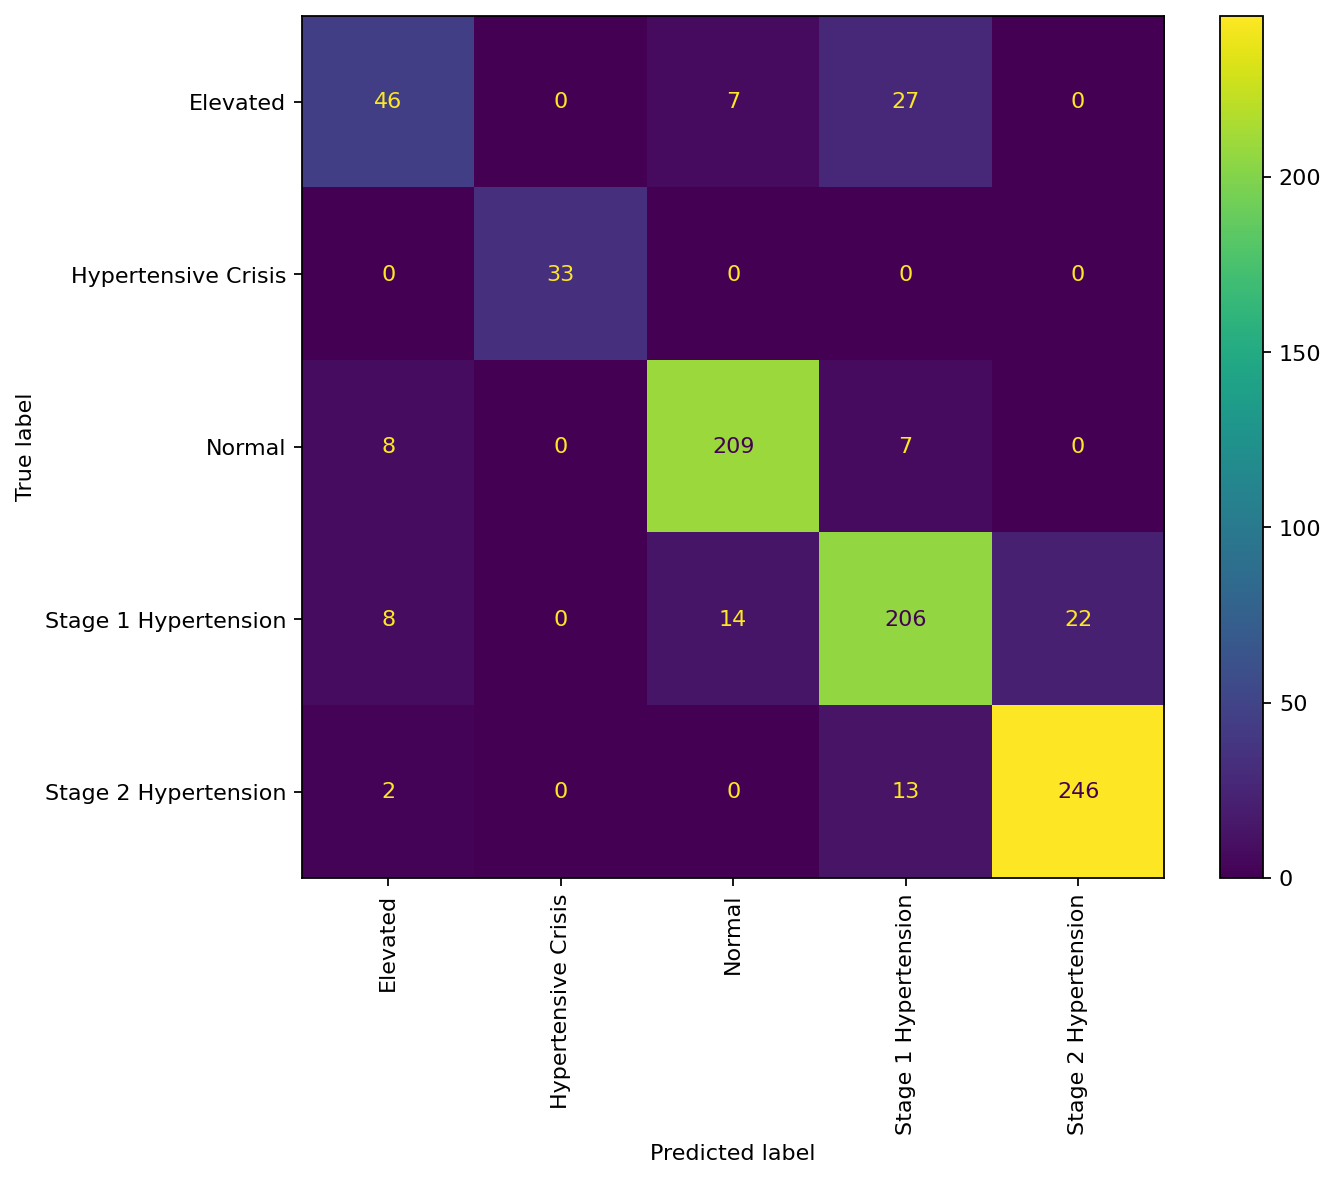

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Grid_model.classes_)
fig, ax = plt.subplots(figsize=(9, 7), dpi=160)
disp.plot(ax=ax)
plt.xticks(rotation=90)
plt.show()

From the confusion matrix it was drawn that the model the **Normal** stage was classified correctly 209 times. The model struggles to differentiate between **Elevated** and **Stage 1**, with 27 cases classified as **Stage 1 hypertension** which is logical since the two stages are close given the patients Blood Pressure readings. **Stage 1 hypertension** was correctly predicted 206 times and mistaken for **Stage 2** 13 times. **Stage 2** has the highest correct predictions of 246. Lastly the **Hypertension Crisis** class was correctly predicted all 33 times.

In [19]:
from sklearn.metrics import RocCurveDisplay
roc_auc= RocCurveDisplay

The Receiver Operator Characteristic curve is constructed below showing the True positive and False Negative rates for each class using the plot_multiclass_roc function. The plot further indicates how good a classifier the Logistic Regression model was through out the five classes. The greater the Area Under the Curve the better the performance ,with Hypertension Crisis being the most accurately predicted and Elevated stage being the least accurately forecasted.

In [21]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(6, 6)):
    # use decision_function or predict_proba depending on model
    try:
        y_score = clf.decision_function(X_test)
    except AttributeError:
        y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # convert true labels to binary matrix
    y_test_bin = pd.get_dummies(y_test, drop_first=False).values

    # compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plot ROC curves
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Multiclass ROC Curve')

    # stage names
    stage_names = ['Elevated', 'Hypertensive Crisis', 'Normal', 'Stage 1 Hypertension', 'Stage 2 Hypertension']

    # plot each ROC curve
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i],
                label=f'ROC curve (area = {roc_auc[i]:.2f}) for {stage_names[i]}')
    
    ax.legend(loc='best')
    ax.grid(alpha=0.3)
    sns.despine()
    plt.show()


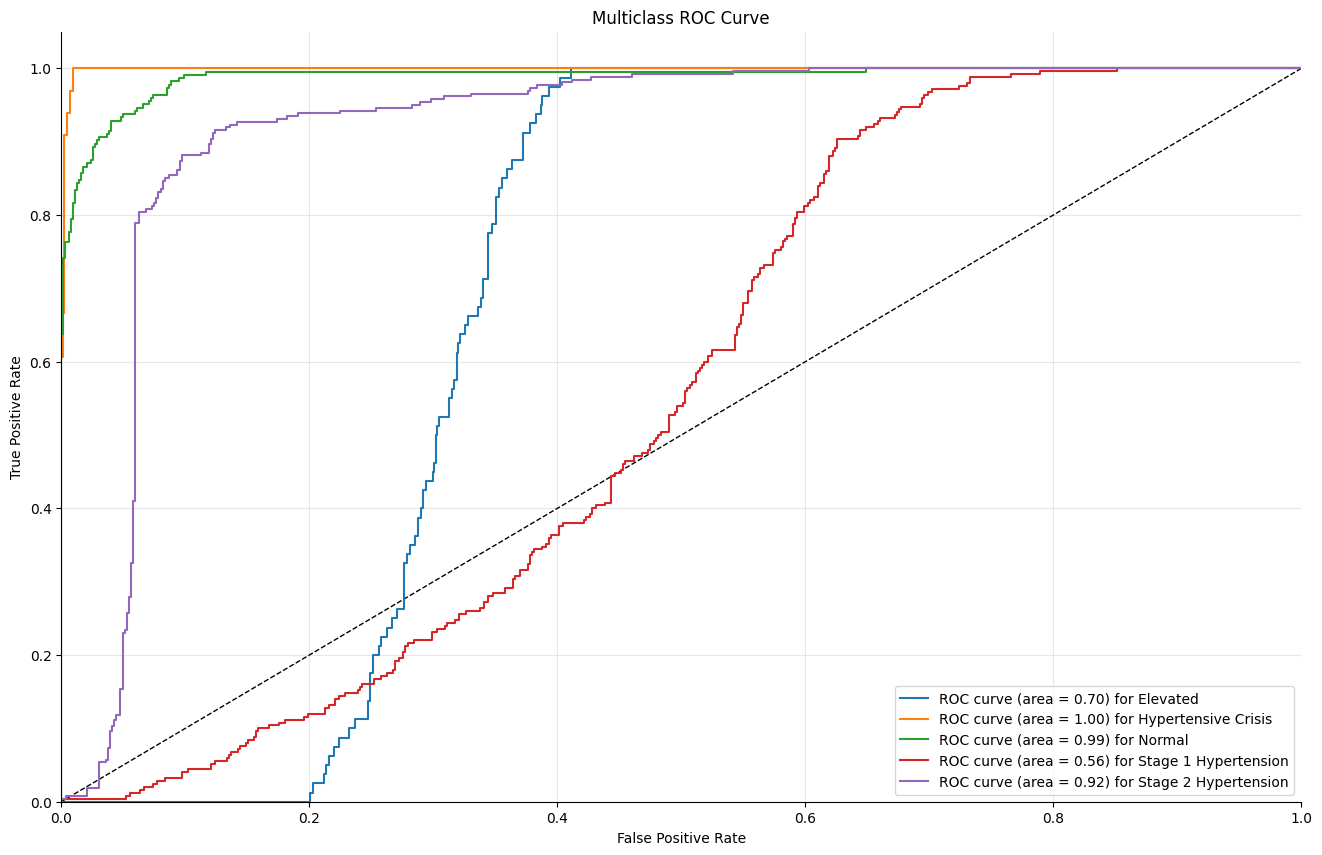

In [22]:
plot_multiclass_roc(Grid_model, scaled_X_test, y_test, n_classes=5, figsize=(16, 10))